In [1]:
import numpy as np
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Fit GARCH model function
def fit_garch(df, vol='Garch', p=1, q=1, dist='Normal'):
    # Calculate the log returns
    log_returns = np.log(df / df.shift(1)).dropna()

    # Fit the GARCH model
    model = arch_model(log_returns, vol=vol, p=p, q=q, dist=dist)
    results = model.fit(update_freq=0, disp='off')

    return results



In [3]:
# Load Data
df = pd.read_excel("Daily closes.xlsx", "TTF 1st Month Daily")

In [4]:
df.tail()

,Date,TZT1 Comdty - Last Price,TZT1 Comdty - Open Interest,TZT1 Comdty - Volume
2676,2012-12-11,27.477,NaN,510.0
2677,2012-12-10,27.752,NaN,150.0
2678,2012-12-07,28.188,NaN,100.0
2679,2012-12-06,28.214,NaN,235.0
2680,2012-12-05,28.427,NaN,60.0


In [5]:
drop_list = ["TZT1 Comdty - Volume", "TZT1 Comdty - Open Interest"]

In [6]:
df.drop(drop_list, inplace=True, axis=1)

In [7]:
df.set_index("Date", inplace=True)

In [8]:
df.tail()

,TZT1 Comdty - Last Price
Date,
2012-12-11,27.477
2012-12-10,27.752
2012-12-07,28.188
2012-12-06,28.214
2012-12-05,28.427


In [9]:
# Fit a GARCH(1, 1) model
garch_results = fit_garch(df)

/Users/mus/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001714. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [10]:
# Extract standardized residuals and conditional volatility
residuals = garch_results.resid
conditional_volatility = garch_results.conditional_volatility

# Combine the residuals and conditional volatility in a new DataFrame
plot_data = pd.DataFrame({'Standardized Residuals': residuals, 'Conditional Volatility': conditional_volatility})


In [11]:
def monthly_averages(df):
    # Ensure that the index is a DateTimeIndex
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)

    # Resample the DataFrame to a monthly frequency and calculate mean
    monthly_average_df = df.resample('M').mean()

    return monthly_average_df

# usage
df_monthly = monthly_averages(plot_data)

In [12]:
df_monthly.tail(24)

,Standardized Residuals,Conditional Volatility
Date,,
2021-05-31,-0.004095,0.037228
2021-06-30,-0.014973,0.034825
2021-07-31,-0.006949,0.035772
2021-08-31,-0.007927,0.041095
2021-09-30,-0.028259,0.071238
2021-10-31,0.016968,0.070055
2021-11-30,-0.017098,0.059031
2021-12-31,0.007587,0.104122
2022-01-31,0.002639,0.066192


In [13]:
md=df_monthly.tail(24)

In [14]:
md["Conditional Volatility"].std()

0.025943641480146728

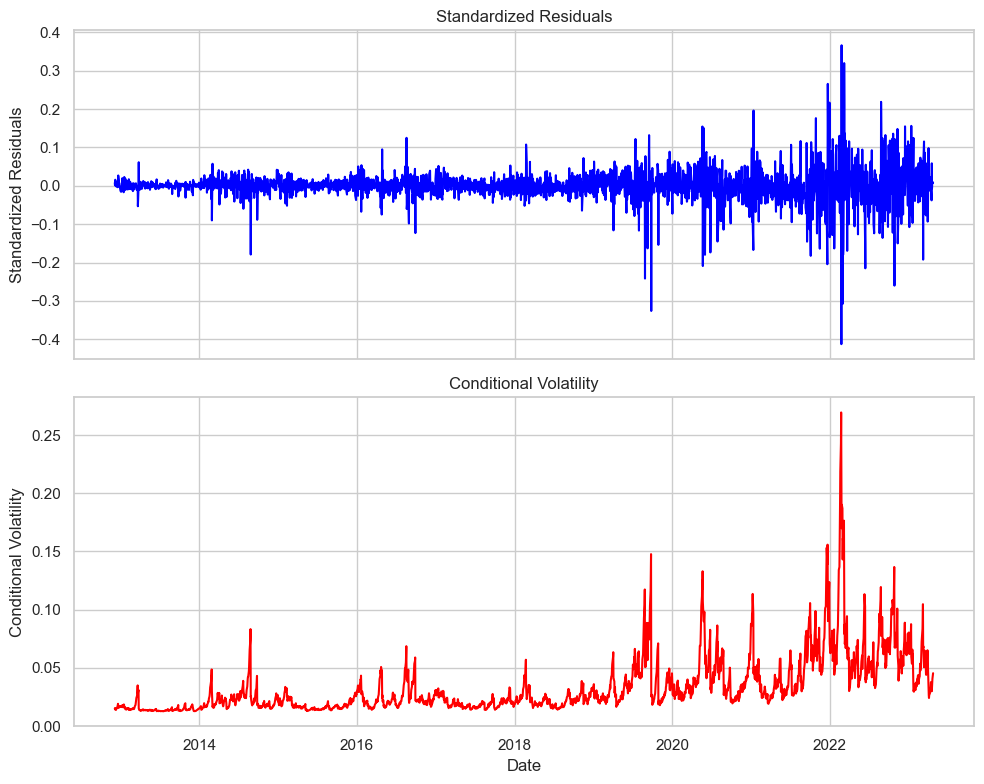

In [18]:
# Set Seaborn style
sns.set(style='whitegrid')

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

# Plot standardized residuals
sns.lineplot(data=plot_data['Standardized Residuals'], ax=axes[0], color='blue')
axes[0].set_title('Standardized Residuals')

# Plot conditional volatility
sns.lineplot(data=plot_data['Conditional Volatility'], ax=axes[1], color='red')
axes[1].set_title('Conditional Volatility')

# Display the plots
plt.tight_layout()
plt.savefig("TTF-Daily.png")